# START

In [417]:
# importing necessory Libraries necessory for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [424]:
# Load dataset
df = pd.read_csv('Advertising.csv', index_col=0) # index_col=0 first column in the CSV file should be treated as the index, 
                                                 # and pandas will not create an additional index column.
df.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [425]:
df.reset_index(drop=True) # 1st row was starting from 1. So, used reset_index(drop=True) start row from 0

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [427]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

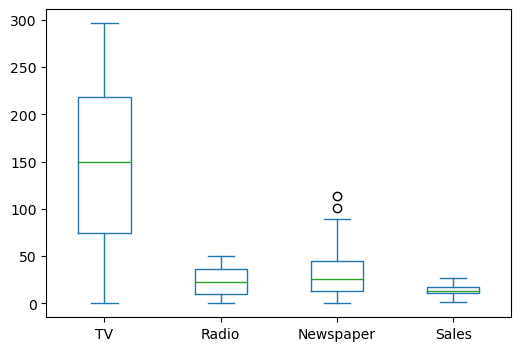

In [428]:
df.plot(kind='box', figsize=(6,4)) # iloc -> first ':' is row selector and second ':' is column selector 

<Axes: >

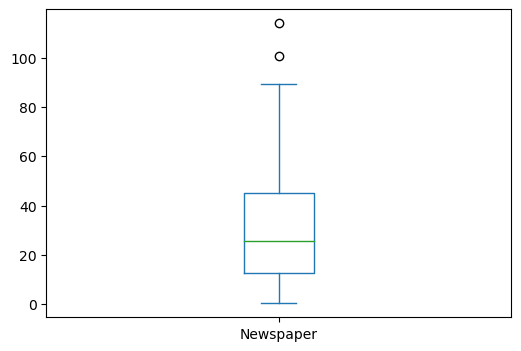

In [429]:
df['Newspaper'].plot(kind='box', figsize=(6,4))

**2 Outliers detected!**

In [430]:
def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [431]:
# Remove outlier by Function or One line code

# df = remove_outlier(df,'Newspaper')
# OR
df = df[df['Newspaper']<90].reset_index(drop=True)

<Axes: >

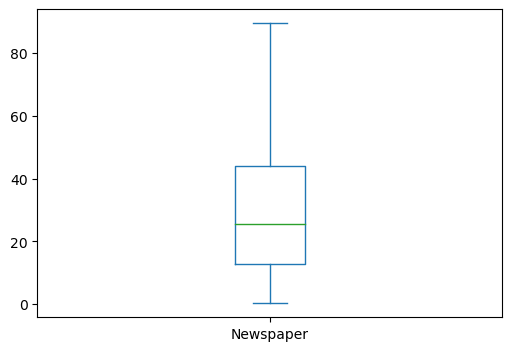

In [432]:
df['Newspaper'].plot(kind='box', figsize=(6,4))

**Data is cleaned and ready for further analysis**

<Axes: xlabel='Newspaper', ylabel='Density'>

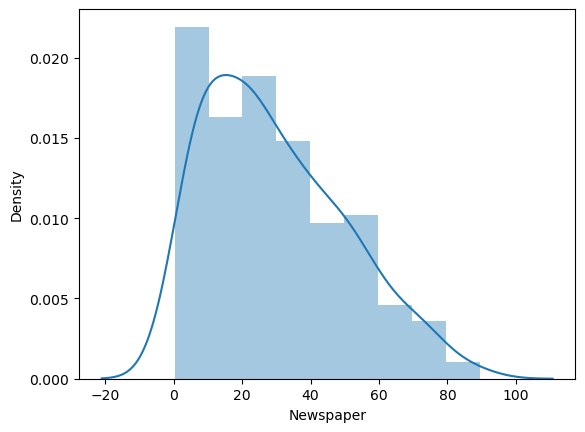

In [433]:
sns.distplot(df['Newspaper'])

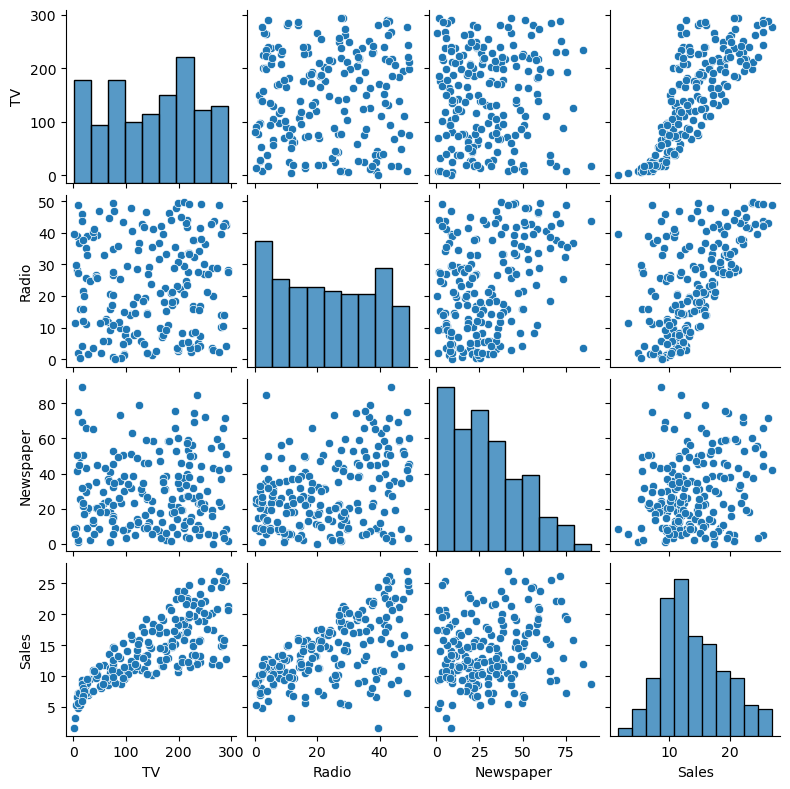

In [450]:
sns.pairplot(df,height=2)

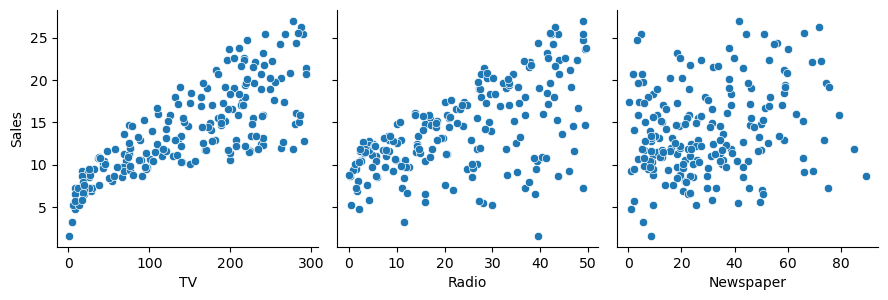

In [435]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',
             height=3, aspect=1, kind='scatter')
plt.show()

**TV advertisement are the only one which increase sales with advertisement. Other are mixed in their behavior** 

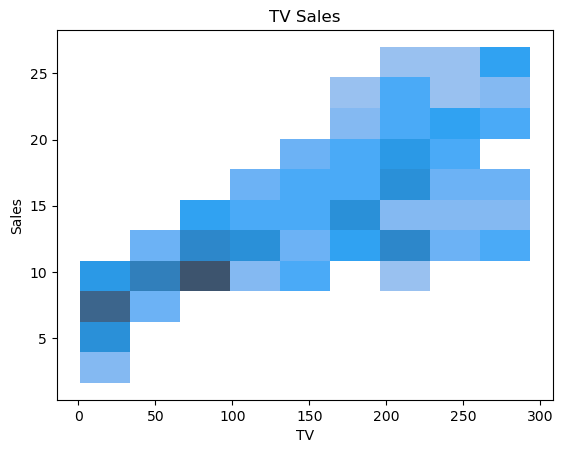

In [436]:
# Hist Plot of TV Sales
sns.histplot(x='TV', y='Sales', data=df)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV Sales')
# plt.xticks(rotation=90)
plt.show()

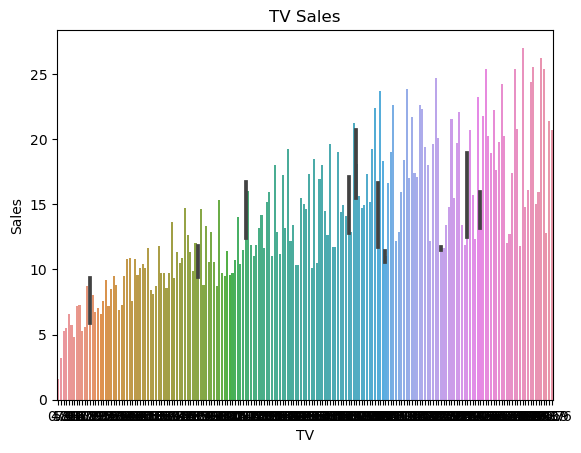

In [437]:
# Bar Chart of TV Sales
sns.barplot(x='TV', y='Sales', data=df)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV Sales')
# plt.xticks(rotation=90)
plt.show()

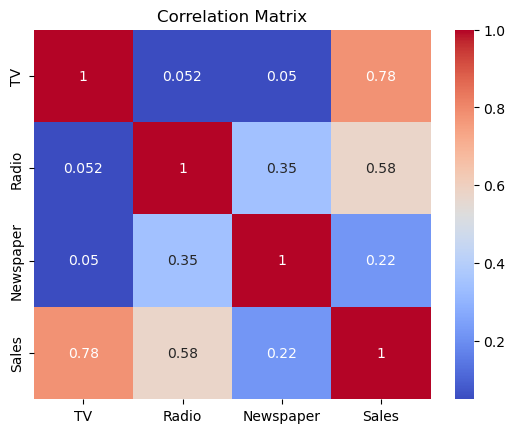

In [438]:
sns.heatmap(df.corr(), cmap='coolwarm' , annot=True)
plt.title('Correlation Matrix')
plt.show()

**High Correlation in TV advertisement**

# Model Training

In [439]:
#Import train_test_split 
from sklearn.model_selection import train_test_split

#separating Features and Target columns 
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

# splitting data into Train and Test by the ratio of 80% Train and 20% Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=209)
x_train.shape, x_test.shape

((158, 3), (40, 3))

### Standard Scaler

In [440]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transforming data into 0s and 1s
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [441]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

**Model Evaluation**

In [442]:
from sklearn import metrics
predict = model.predict(x_test_scaled)

error_score = metrics.r2_score(y_test, predict)
print('R squared error: ', error_score)

R squared error:  0.950619541317632


In [443]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 1.61
R-squared Score: 0.95


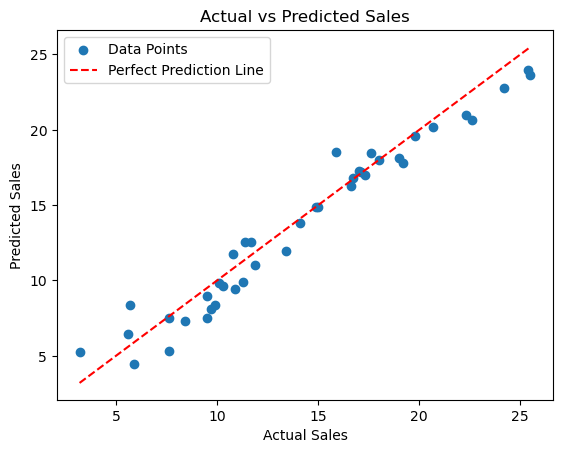

In [444]:
# Visualize predicted vs actual sales with a line
plt.scatter(y_test, y_pred, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         linestyle='--', color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# Best random_state value for r2_score


In [445]:
scores=[]
for i in range(1000):
    #separating Features and Target columns 
    x = df[['TV','Radio','Newspaper']]
    y = df['Sales']

    # splitting data into Train and Test by the ratio of 80% Train and 20% Test Data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    scaler = StandardScaler()
    # transforming data into 0s and 1s
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    model = LinearRegression()
    model.fit(x_train_scaled,y_train)
    
    predict = model.predict(x_test_scaled)
    
    scores.append(metrics.r2_score(y_test, predict))

In [446]:
print('Best random_state value with highest r2_score: ',np.argmax(scores))
print('Best r2_score: ', scores[np.argmax(scores)])

Best random_state value with highest r2_score:  209
Best r2_score:  0.950619541317632


**Model has best trained**

# SUMMARY

Built a sales prediction model using Linear Regression on advertising data.

Mean Squared Error: 1.61

R-squared Score: 0.95

Visualized the model's performance with a scatter plot and a perfect prediction line.
Exciting insights gained from correlation analysis and model evaluation.

# END